In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
import pathlib

sys.path.append('..')
import about
import pathcustomize
import pandas as pd

from waldo.conf import settings
from waldo.wio.experiment import Experiment
from waldo.metrics.report_card import WaldoSolver
import matplotlib.pyplot as plt


#plt.style.use('bmh')
about.about()

Python 2.7.6 (default, Sep  9 2014 15:04:36) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.39)] on darwin, Host: ChemE-87.chem-eng.northwestern.edu


In [5]:
eid = '20130318_131111'
experiment = Experiment(experiment_id=eid)
graph = experiment.graph.copy()

In [6]:
ws = WaldoSolver(experiment=experiment, graph=graph)
ws.initial_clean()
report_df1 = ws.report_card.report(show=False)
ws.solve()
report_df2 = ws.report_card.report(show=False)

collisions from bbox
	67 suspects. trying 0 again
	19 suspects. trying 0 again
	5 suspects. trying 0 again
	2 suspects. trying 0 again
	1 suspects. trying 0 again
	1 suspects. trying 0 again
	58 resolved 61%
	2 missing data 2%
	0 missing data, no overlap 0%
	37 full data, no  overlap 38%
--- collisions ---


--- prune ---


--- consolidate ---


collapse g
fission-fusion
fission-fusion rel


remove single descendents


--- gaps ---


580

../../code/waldo/network/graph.py:410: Warning: bridge_gaps() trying to connect non-existant nodes
  warnings.warn('bridge_gaps() trying to connect non-existant nodes', Warning)


 real
117 to_missing
116 from_missing
27 missing_to_missing
43 new_real
74 failed_links
149 missing points used up
75 unique used
7 max recursion
320 missing points to start with
245 missing points left
collisions from bbox
	21 suspects. trying 0 again
	7 suspects. trying 0 again
	6 suspects. trying 0 again
	4 suspects. trying 0 again
	2 suspects. trying 0 again
	0 suspects. trying 0 again
	34 resolved 85%
	0 missing data 0%
	0 missing data, no overlap 0%
	6 full data, no  overlap 15%
--- collisions ---


--- prune ---
--- consolidate ---


collapse g
fission-fusion
fission-fusion rel


remove single descendents


--- gaps ---


188

 real
89 to_missing
93 from_missing
19 missing_to_missing
3 new_real
86 failed_links
8 missing points used up
6 unique used
4 max recursion
245 missing points to start with
239 missing points left
collisions from bbox
	1 suspects. trying 0 again
	0 resolved 0%
	0 missing data 0%
	0 missing data, no overlap 0%
	1 full data, no  overlap 100%
--- collisions ---


--- prune ---
--- consolidate ---


collapse g
fission-fusion
fission-fusion rel
remove single descendents
--- gaps ---


47

 real
87 to_missing
91 from_missing
20 missing_to_missing
2 new_real
85 failed_links
4 missing points used up
4 unique used
4 max recursion
239 missing points to start with
235 missing points left
collisions from bbox
	1 suspects. trying 0 again
	0 resolved 0%
	0 missing data 0%
	0 missing data, no overlap 0%
	1 full data, no  overlap 100%
--- collisions ---


--- prune ---
--- consolidate ---


collapse g
fission-fusion
fission-fusion rel
remove single descendents
--- gaps ---


12

 real
87 to_missing
89 from_missing
19 missing_to_missing
0 new_real
87 failed_links
0 missing points used up
0 unique used
4 max recursion
235 missing points to start with
235 missing points left
collisions from bbox
	1 suspects. trying 0 again
	0 resolved 0%
	0 missing data 0%
	0 missing data, no overlap 0%
	1 full data, no  overlap 100%
--- collisions ---


--- prune ---
--- consolidate ---


collapse g
fission-fusion
fission-fusion rel
remove single descendents
--- gaps ---


0

 real
87 to_missing
89 from_missing
19 missing_to_missing
0 new_real
87 failed_links
0 missing points used up
0 unique used
4 max recursion
235 missing points to start with
235 missing points left


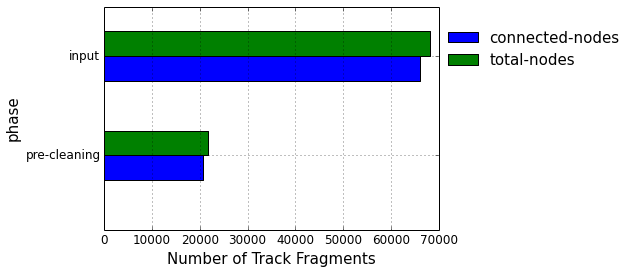

In [7]:
def plot_report_df(df):
    # reformat df contents
    d = df[['phase', 'connected-nodes', 'total-nodes']][::-1]
    d = d.drop_duplicates('phase', take_last=False)
    d = d.set_index('phase')

    # create plot
    fig = plt.figure()
    ax = plt.subplot(axisbg='white')
    d.plot(ax=ax, kind='barh')
    ax.set_xlabel('Number of Track Fragments', size=15)
    ax.legend(frameon=False, loc=(1.01, 0.7), fontsize=15)
    ax.set_ylabel('phase', size=15)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    #plt.tight_layout()
    plt.show()


# df = ws.report_card.report(show=False)   # how these dataframes are generated
df = report_df1.copy()
plot_report_df(df)

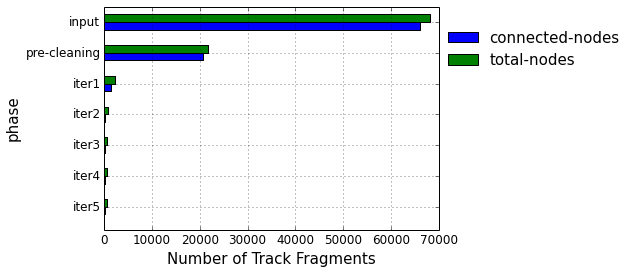

In [8]:
df = report_df2.copy()
plot_report_df(df)

['add_subplot', 'subplotpars', 'subplots_adjust']


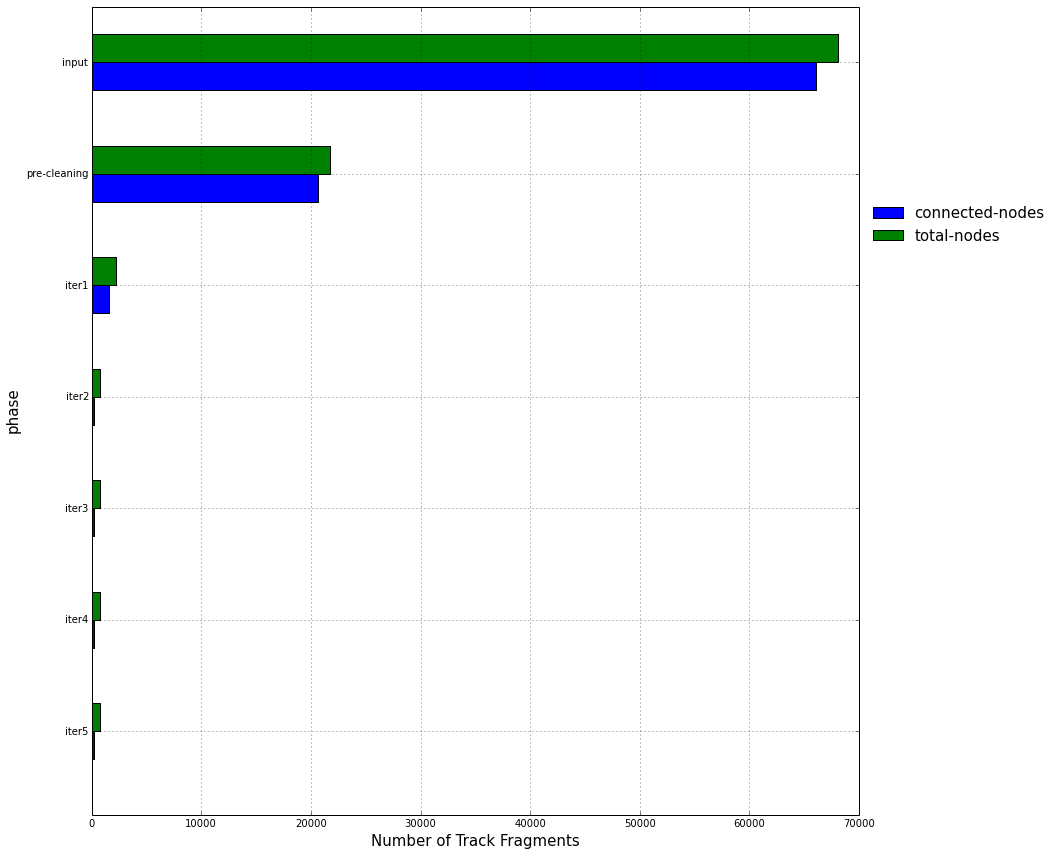

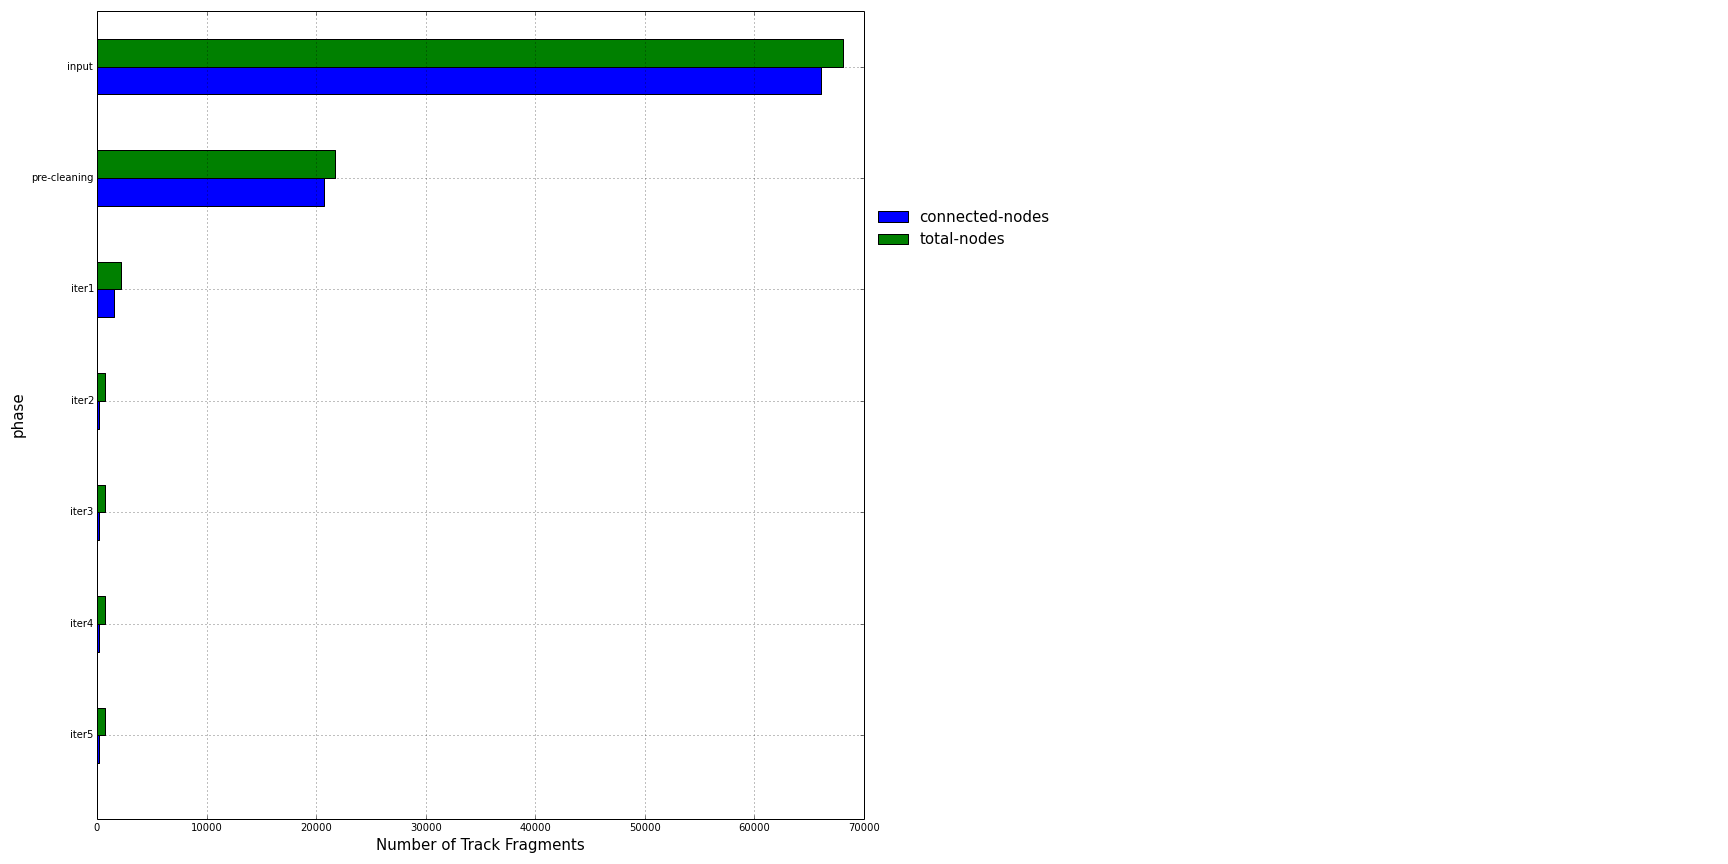

In [43]:
d = df[['phase', 'connected-nodes', 'total-nodes']][::-1]
d = d.drop_duplicates('phase', take_last=False)
d = d.set_index('phase')

fig = plt.figure(figsize=(24, 12))
ax = plt.subplot(axisbg='white')
d.plot(ax=ax, kind='barh')
ax.set_xlabel('Number of Track Fragments', size=15)
lgd = ax.legend(frameon=False, loc=(1.01, 0.7), fontsize=15)
ax.set_ylabel('phase', size=15)
print([x for x in dir(fig) if 'subpl' in x])
fig.tight_layout()
plt.subplots_adjust(right=0.5)
fig.savefig('pepe.png') #, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

from IPython.display import Image
Image(filename='pepe.png') 